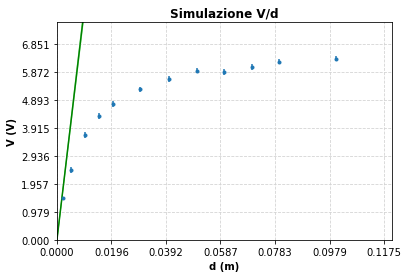

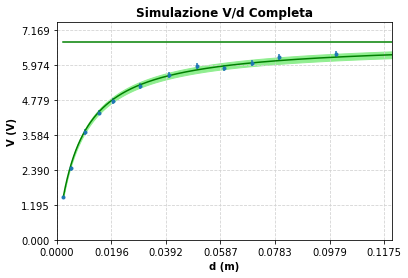

Q fittato ed errore
[1.85575224e-10]
[8.7138446e-13]
Q vero
[1.85362671e-10]
[3.41631899e-12]


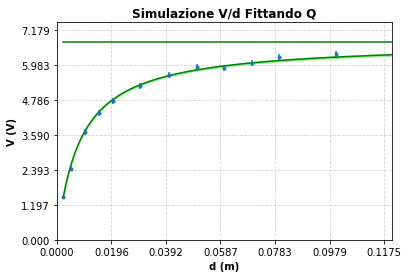

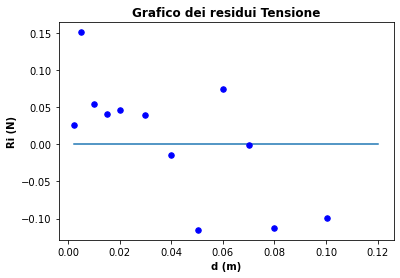

sigma_post_fit
0.08546777063167642
chiquadro
7.990325544832554
chiquadroridotto
0.7990325544832554
sigma_PF_Pesata
[0.02681659 0.08938862 0.08938862 0.08938862 0.08938862 0.08938862
 0.08938862 0.08938862 0.08938862 0.08938862 0.08938862 0.08938862]
Verr
[0.03 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]


In [31]:
#simulazione PARTE 1 - ESPERIENZA 1

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

eps0 = 8.86E-12

d = np.array([0.002,0.005,0.01,0.015,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1])
derr = 0.0002
#commentare
d = d-np.random.normal(0, derr, len(d))

Dc = 0.18
Dcerr = 0.0001
Dc = Dc-np.random.normal(0, Dcerr, 1)
#Dc = 

A = np.pi/4*Dc**2
A_err = A*2*Dcerr/Dc

D1 = 0.1
D1err = 0.0001
L = 0.15
Lerr = 0.0001

Sicepail = np.pi*D1/2*L
Sicepailerr = Sicepail*(Lerr/L+D1err/D1)

Q = Qsimulata = 2.00084732e-10
Q = Qsimulata = Qsimulata*Sicepail/A
Qerr = Qsimulataerr = Qsimulata*(Sicepailerr/Sicepail+A_err/A+2.90136764e-12/Qsimulata)

Ce = 2.74424417e-11
Ce_err = 2.06085147e-12

b = eps0*A
berr = b*A_err/A

V = Qsimulata/(Ce+b/d)
#commentare
Verr = np.ones(len(d))
for i in range(len(Verr)):
	if(V[i]<25):
		Verr[i] = 0.3
		if(V[i]<8):
			Verr[i] = 0.1
		if(V[i]<2.5):
			Verr[i] = 0.03
#Verr = np.array([])
V = V-np.random.normal(0, Verr, len(V))
#V = np.array([])





#SIMULAZIONE V/d LINEARE

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
ax.set_yticks(np.arange(0, max(V)*1.2, (max(V)-min(V))/5))
plt.xlim(0, max(d)*1.2)
plt.ylim(0, max(V)*1.2)
plt.title("Simulazione V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")

plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')
plt.grid(color='lightgray',linestyle="--",zorder=0)


def objective(x,Q2):
	return Q2/b*x



x = np.linspace(min(d)/1000,max(d)*1.2,1000)
# calculate the output for the range
y = objective(x,Q)

# create a line plot for the mapping function
plt.plot(x, y, '-', color='green')

x_err_min = objective(x,Q-Qerr);
x_err_max = objective(x,Q+Qerr);

plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)
plt.show()

#SIMULAZIONE V/d COMPLETA

fig = plt.figure()
ax = fig.gca()

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.title("Simulazione V/d Completa",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')



def objective(x,Q2):
	return Q2/(((b/x)+Ce))
 


x = np.linspace(min(d),max(d)*1.2,1000)
# calculate the output for the range
y = objective(x,Q)


# create a line plot for the mapping function
plt.plot(x, y, '-', color='green')

x = np.linspace(min(d),max(d)*1.2,1000)

yAsynth = np.ones(1000)*Q/Ce
ymax = yAsynth[0]+yAsynth[0]/10

plt.plot(x, yAsynth, '-', color='green')
ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
ax.set_yticks(np.arange(0, ymax, (ymax-min(V))/5))
plt.xlim(0, max(d)*1.2)
plt.ylim(0, ymax)
x_err_min = objective(x,Q-Qerr);
x_err_max = objective(x,Q+Qerr);

plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.show()


#SIMULAZIONE V/d Fittata e trovando Q

from scipy.optimize import curve_fit

def fitobjective2(x,Q):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q])

popt,pcov = curve_fit(fitobjective2, d, V,p0=guess, sigma=Verr)
err = np.sqrt(np.diag(pcov))

Q2 = popt

popt,pcov = curve_fit(fitobjective2, d, V,p0=guess, sigma=(Verr**2+derr*((b*Q*np.log(d))/(b/d+Ce)**2)**2)**(1/2))
err = np.sqrt(np.diag(pcov))


Q_fit_err = err
Q_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)
print("Q vero")
print(Q)
print(Qerr)



x = np.linspace(min(d),max(d)*1.2,1000)
y = fitobjective2(x, Q_fit)

yAsynth = np.ones(1000)*Q_fit/Ce
ymax = yAsynth[0]+yAsynth[0]/10

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
ax.set_yticks(np.arange(0, ymax, (ymax-min(V))/5))
plt.xlim(0,max(d)*1.2)
plt.ylim(0, ymax)
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x, y, '-', color='green')
plt.plot(x, yAsynth, '-', color='green')

x_err_min = fitobjective2(x,Q_fit-Q_fit_err );# 3 sigma errore
x_err_max = fitobjective2(x,Q_fit+Q_fit_err);# 3 sigma errore
plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V/d Fittando Q",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')



plt.show()



#GRAFICO RESIDUI

Vf = fitobjective2(d,Q_fit)

Ri = Vf-V

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Tensione",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("Ri (N)",fontweight="bold")
plt.plot(x,np.zeros(1000))
plt.scatter(d,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Vf-V)**2)/(len(Vf)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)


  
chiquadro = np.sum((Ri)**2/Verr**2)
print("chiquadro")
print(chiquadro)
chiquadroridotto = chiquadro/(len(Vf)-2)
print("chiquadroridotto")
print(chiquadroridotto)
sigma_PF_Pesata = Verr*(chiquadroridotto)**(1/2)
print("sigma_PF_Pesata")
print(sigma_PF_Pesata)
print("Verr")
print(Verr)



# New Section